In [1]:
K=3

In [52]:
import numpy as np
X=np.array([1,2,3,4,5,10,11,12,13,20,21,22,23])
# mu_0=[np.mean(X)-np.std(X),np.mean(X),np.mean(X)+np.std(X)]
mu_new=np.array([20,1,2])
mu_old=np.ones(3)*np.inf
count=0
while np.linalg.norm(mu_old-mu_new)>0.1 and count<100:
    count+=1
    mu_old=mu_new.copy()
    print(count,f' mu_old is {mu_old}')
    R=np.zeros((K,X.shape[0]))
    for i in range((X.shape[0])):
        index=np.argmin([np.linalg.norm(X[i]-mu_old[j]) for j in range(K)])
        R[index,i]=1
    num=np.matmul(R,X.reshape(-1,1)).reshape(K)
    den=R.sum(axis=1)
    mu_new= np.divide(num,den,out=np.zeros_like(num, dtype=float),where=(den != 0) & (num != 0))
    # print(f' mu_new is {mu_new}')
        

1  mu_old is [20  1  2]
2  mu_old is [17.42857143  1.          4.8       ]
3  mu_old is [18.5  1.5  6.6]
4  mu_old is [19.8  2.5  9.5]
5  mu_old is [21.5  3.  11.5]


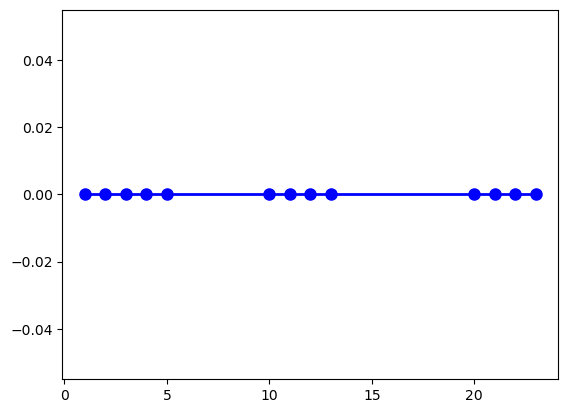

In [47]:
from matplotlib import pyplot as plt
y = np.zeros_like(X)
plt.plot(X,y, '-o', color='blue', markersize=8, linewidth=2, label='1D Data')
# plt.plot(X)
# plt.scatter(range(len(X)), X)

In [35]:
from sklearn.cluster import KMeans
import numpy as np


# create model
kmeans = KMeans(
    n_clusters=3,      # number of clusters
    random_state=2    # for reproducibility
)

# fit model
kmeans.fit(X.reshape(-1,1))

# predictions
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster labels:", labels)
print("Cluster centers:\n", centers)


Cluster labels: [2 2 2 2 2 0 0 0 0 1 1 1 1]
Cluster centers:
 [[11.5]
 [21.5]
 [ 3. ]]


D:\installedPrograms\Anaconda2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
X.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [10],
       [11],
       [12],
       [13],
       [20],
       [21],
       [22],
       [23]])

In [22]:
mu_new

array([ 1.        ,  3.        , 12.16666667])

In [53]:
R

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.]])

In [55]:
np.argmax(R, axis=0)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0])

In [4]:
R=np.zeros((K,X.shape[0]))

In [5]:
mu_0=np.array([0,1,2])

In [ ]:
np.linalg

In [24]:
X

array([ 1,  2,  3,  4,  5, 10, 11, 12, 13, 20, 21, 22, 23])

In [7]:
print(np.linalg.norm(X[0]-mu_0[0]))
print(np.linalg.norm(X[0]-mu_0[1]))
print(np.linalg.norm(X[0]-mu_0[2]))

1.0
0.0
1.0


In [51]:
[np.linalg.norm(X[1]-mu_0[j]) for j in range(K)]

[np.float64(2.0), np.float64(1.0), np.float64(0.0)]

In [10]:
for i in range((X.shape[0])):
    index=np.argmin([np.linalg.norm(X[i]-mu_0[j]) for j in range(K)])
    R[index,i]=1
    print(index)

1
2
2
2
2
2
2
2
2
2
2
2
2


In [9]:
R

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [60]:
X1=X.reshape(-1,1)

In [61]:
X1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [10],
       [11],
       [12],
       [13],
       [20],
       [21],
       [22],
       [23]])

In [73]:
R

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [12]:
den=R.sum(axis=1)
den

array([ 0.,  1., 12.])

In [11]:
num=np.matmul(R,X.reshape(-1,1)).reshape(K)
num

array([  0.,   1., 146.])

In [80]:
np.matmul(R,X1).reshape(K)/R.sum(axis=1)

C:\Windows\Temp\ipykernel_18472\1149962486.py:1: RuntimeWarning: invalid value encountered in divide
  np.matmul(R,X1).reshape(K)/R.sum(axis=1)


array([        nan,  1.        , 12.16666667])

In [83]:
result = np.where(num == 0, 0, num / den)
print(result)

[ 0.          1.         12.16666667]


C:\Windows\Temp\ipykernel_18472\3905409365.py:1: RuntimeWarning: invalid value encountered in divide
  result = np.where(num == 0, 0, num / den)


In [86]:
num=np.array([0,5,0,12])
den=np.array([0,0,6,3])

In [ ]:
num=np.matmul(R,X.reshape(-1,1)).reshape(K)
den=R.sum(axis=1)
result = np.divide(num,den,out=np.zeros_like(num, dtype=float),where=(den != 0) & (num != 0))

result

In [17]:
result = np.divide(
    num,
    den,
    out=np.zeros_like(num, dtype=float),
    where=(den != 0) & (num != 0)
)

result

array([ 0.        ,  1.        , 12.16666667])

In [15]:
R.sum(axis=1)

array([ 0.,  1., 12.])

In [70]:
mu_0

array([0, 1, 2])

In [ ]:
d = []